In [1]:
%pip install ucimlrepo

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando a biblioteca numpy e math que fornece funções matemáticas básicas
import numpy as np
import math

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
forest_fires = fetch_ucirepo(id=162)

# data (as pandas dataframes)
X = forest_fires.data.features
y = forest_fires.data.targets

# metadata
print(forest_fires.metadata)

# variable information
print(forest_fires.variables)

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [4]:
df_teste = X.copy()
df_teste['area'] = y

selected_columns = ['area','month','day','temp','DMC']

df_dummy = df_teste[selected_columns].copy()


In [5]:
from sklearn.preprocessing import LabelBinarizer

# Função para binarizar uma coluna
def binarize_column(df, column_name):
    df[column_name + '_binario'] = df[column_name].apply(lambda x: 1 if x > threshold else 0)
    return df

# Definindo um threshold para a binarização
threshold = 0

# Binarizando colunas específicas
columns_to_binarize = ['area', 'temp','DMC']  # Adicione as colunas que deseja binarizar

for col in columns_to_binarize:
    df_dummy = binarize_column(df_dummy, col)

# Verificando o DataFrame
df_dummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          517 non-null    float64
 1   month         517 non-null    object 
 2   day           517 non-null    object 
 3   temp          517 non-null    float64
 4   DMC           517 non-null    float64
 5   area_binario  517 non-null    int64  
 6   temp_binario  517 non-null    int64  
 7   DMC_binario   517 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 32.4+ KB


In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import math

encoder = OneHotEncoder()

poly_array_month = encoder.fit_transform(df_dummy[['month']])
poly_df_month = pd.DataFrame(poly_array_month.toarray(), columns=encoder.get_feature_names_out(['month']))

poly_array_day = encoder.fit_transform(df_dummy[['day']])
poly_df_day = pd.DataFrame(poly_array_day.toarray(), columns=encoder.get_feature_names_out(['day']))

df_dummy = pd.concat([df_dummy.drop(['month', 'day'], axis=1), poly_df_month, poly_df_day], axis=1)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          517 non-null    float64
 1   temp          517 non-null    float64
 2   DMC           517 non-null    float64
 3   area_binario  517 non-null    int64  
 4   temp_binario  517 non-null    int64  
 5   DMC_binario   517 non-null    int64  
 6   month_apr     517 non-null    float64
 7   month_aug     517 non-null    float64
 8   month_dec     517 non-null    float64
 9   month_feb     517 non-null    float64
 10  month_jan     517 non-null    float64
 11  month_jul     517 non-null    float64
 12  month_jun     517 non-null    float64
 13  month_mar     517 non-null    float64
 14  month_may     517 non-null    float64
 15  month_nov     517 non-null    float64
 16  month_oct     517 non-null    float64
 17  month_sep     517 non-null    float64
 18  day_fri       517 non-null    

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

## n_splits 5

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

model = Ridge(alpha=1.0)
model = Lasso(alpha=0.1)

X = df_dummy.drop(['area'], axis = 1)
Y = df_dummy['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Separate features and target variable
X = df_dummy.drop(columns=['area'])
y = df_dummy['area']

In [9]:
print("Dados de Treino: ", X_train.shape)
print("Dados de Teste : ", X_test.shape)

Dados de Treino:  (387, 24)
Dados de Teste :  (130, 24)


#Modelo Vazio

In [10]:
lm = LinearRegression()
lm

LinearRegression()

In [11]:
#Initialize lists to store the MSE for each fold
mse_scores = []
mae_scores = []
mape_scores = []
r2_scores = []

#Iterate over each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

#Train a linear regression model
    lm.fit(X_train, y_train)

#Predict on the test set
    y_pred = lm.predict(X_test)

#Calculate Mean Squared Error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape= mae/y_test.mean()

    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(lm.score(X_test,y_test))


#Calculate the average MSE across all folds
print("Average MSE :", np.mean(mse_scores))
print("Average MAE :", np.mean(mae_scores))
print("Average MAPE:", np.mean(mape_scores))
print("Average R2  :", np.mean(r2_scores))

print(r2_scores)

Average MSE : 4009.161744437299
Average MAE : 20.49657655255522
Average MAPE: 1.7719540545462995
Average R2  : -0.10829046327815058
[0.021533192184953864, -0.0787105701285844, 0.004356955467868628, 0.01853182409699028, -0.5071637180119812]


In [12]:
from sklearn.model_selection import cross_val_score

splits = 5
scores = cross_val_score(lm, df_dummy.drop(['area'],axis=1), df_dummy['area'], cv = splits, scoring = 'r2')
scores

array([ 0.00000000e+00, -2.83188370e+01, -3.02041940e-02, -7.40524466e-01,
       -2.24940475e-03])

#Modelo Treinado

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
Y_test.columns = ['area']
Y_test.head()

,area
304,0.00
501,0.00
441,1.23
153,1.46
503,1.95


## Avalia o modelo nas variáveis de treino e teste

In [15]:
# Exibindo o R^2

R2_TRAIN=lm.score(X_train,y_train)
print("SCORE TREINO: %.4f" % R2_TRAIN)


R2_TEST=lm.score(X_test,y_test)
print("SCORE TESTE: %.4f" % R2_TEST)

SCORE TREINO: 0.0684
SCORE TESTE: -0.5072


In [16]:
# Erros
Y_pred  = lm.predict(X_train)

mae = mean_absolute_error(y_train, Y_pred)
mse = mean_squared_error(y_train, Y_pred)
rmse = np.sqrt(mse)
mape = mae/y_train.mean()

tt_train = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f \nMAPE = %.3f" % (mae, rmse, mse, mape)

print('Erros do DF Treino')
print(tt_train)

Erros do DF Treino
MAD  = 21.935 
MSRE = 67.684 
MSE   =  4581.179 
MAPE = 1.529


In [17]:
# Erros
Y_pred  = lm.predict(X_test)

mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mae/y_test.mean()

tt_test = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f \nMAPE = %.3f" % (mae, rmse, mse, mape)

print('\n\nErros do DF teste')
print(tt_test)



Erros do DF teste
MAD  = 18.177 
MSRE = 27.142 
MSE   =  736.710 
MAPE = 2.669


Text(500, 0.005, 'SCORE: 0.068386')

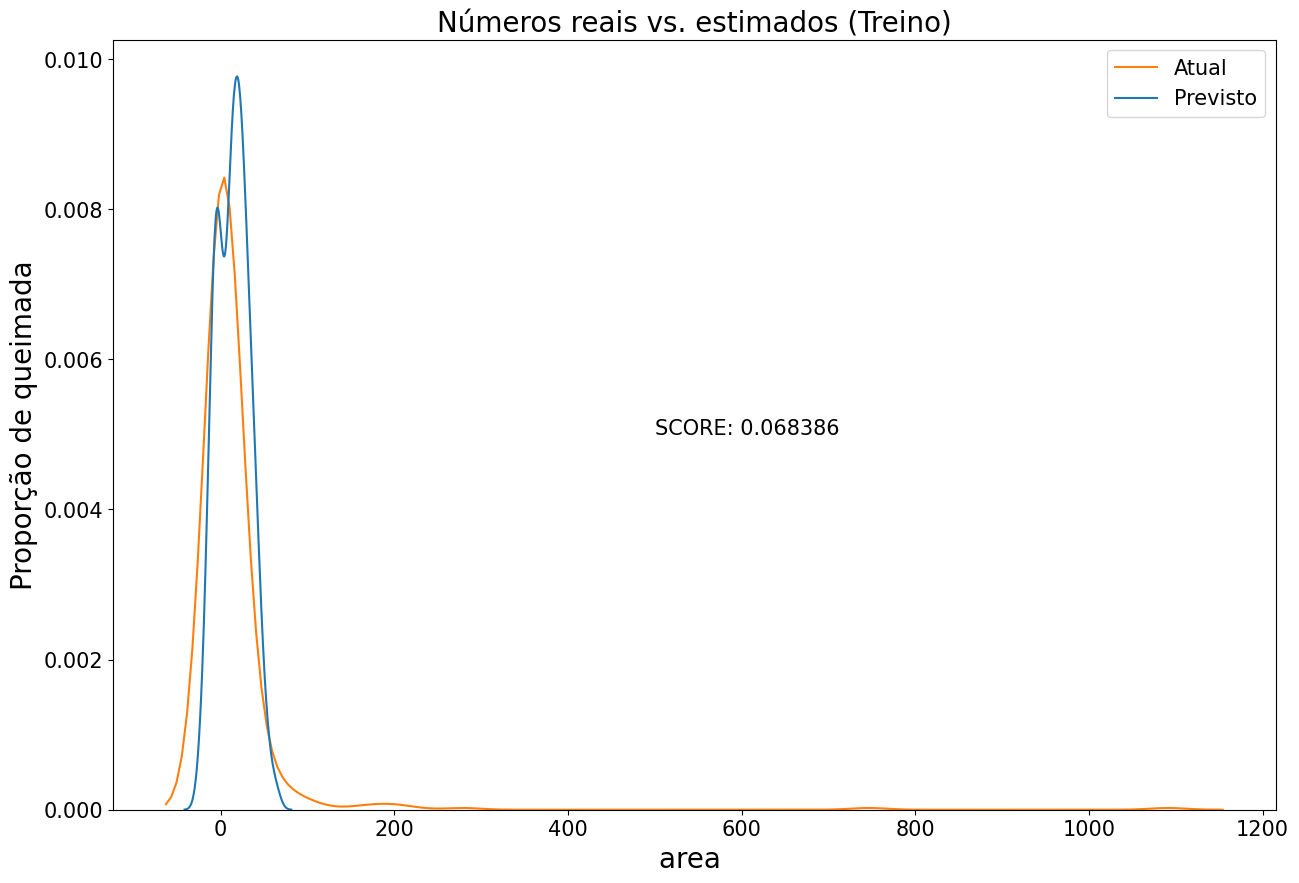

In [18]:
# Predizendo os valores
YHat = lm.predict(X_train)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_train], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (Treino)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_train = "SCORE: %4f" % R2_TRAIN

plt.text(500, 0.005, tt_train, size= 15)

Text(50, 0.005, 'SCORE: -0.507164')

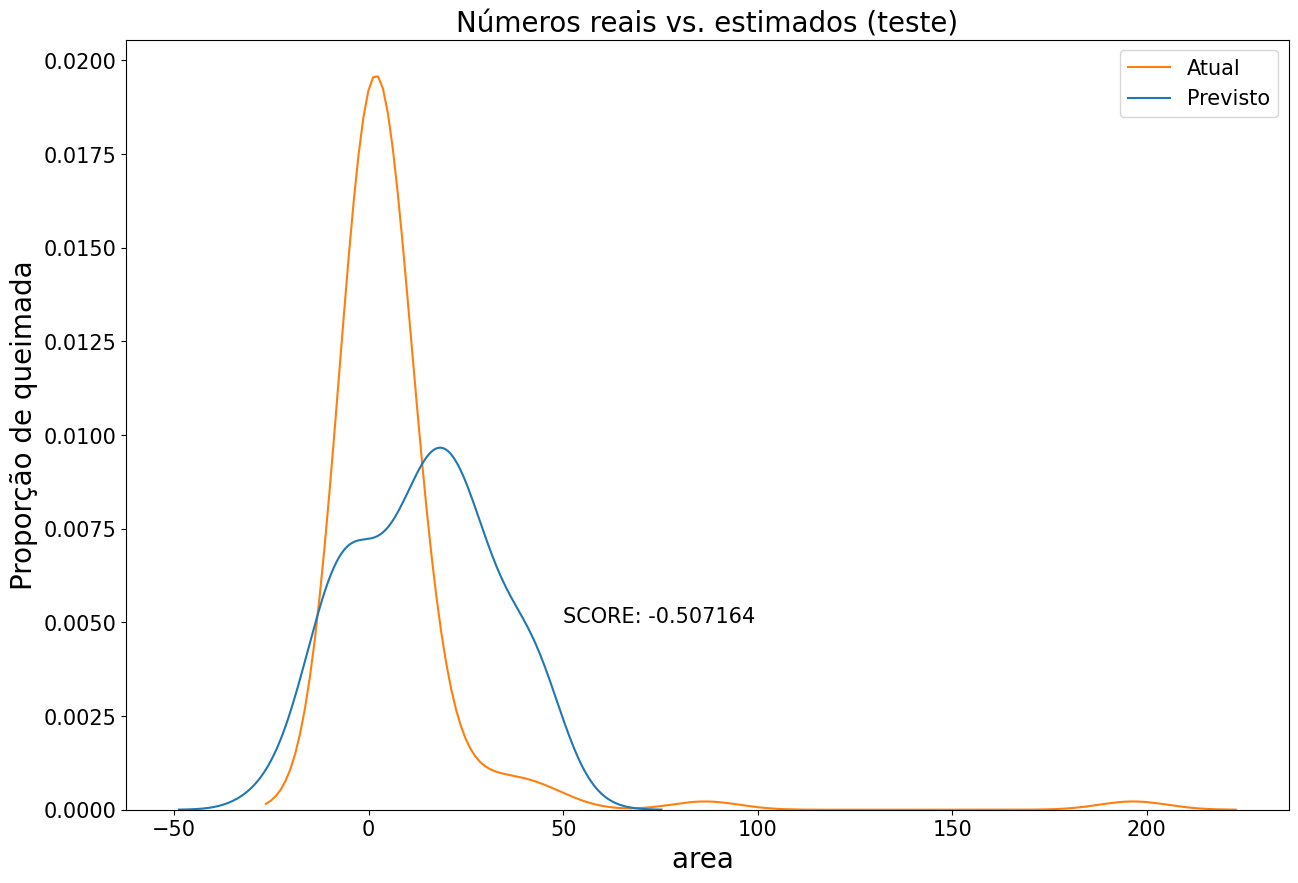

In [19]:
# Predizendo os valores
YHat = lm.predict(X_test)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_test], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (teste)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_test = "SCORE: %4f" % R2_TEST

plt.text(50, 0.005, tt_test, size=15)

## n_splits 10

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

model = Ridge(alpha=1.0)
model = Lasso(alpha=0.1)


X = df_dummy.drop(['area'], axis = 1)
Y = df_dummy['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Separate features and target variable
X = df_dummy.drop(columns=['area'])
y = df_dummy['area']

#Initialize the KFold object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [21]:
#Initialize lists to store the MSE for each fold
mse_scores = []
mae_scores = []
mape_scores = []
r2_scores = []

#Iterate over each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

#Train a linear regression model
    lm.fit(X_train, y_train)

#Predict on the test set
    y_pred = lm.predict(X_test)

#Calculate Mean Squared Error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape= mae/y_test.mean()

    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(lm.score(X_test,y_test))


#Calculate the average MSE across all folds
print("Average MSE :", np.mean(mse_scores))
print("Average MAE :", np.mean(mae_scores))
print("Average MAPE:", np.mean(mape_scores))
print("Average R2  :", np.mean(r2_scores))

print(r2_scores)

Average MSE : 3995.8058811700903
Average MAE : 20.208537863971543
Average MAPE: 1.938744352726158
Average R2  : -0.5002999410598512
[0.0167259409045738, 0.12744832042270882, -2.0916871799559327, 0.047549536647720214, -0.6181900789376367, 0.1521098722357349, -0.3918859536860555, 0.009273043133307568, -2.001779834032357, -0.2525630773305756]


In [22]:
from sklearn.model_selection import cross_val_score

splits = 10
scores = cross_val_score(lm, df_dummy.drop(['area'],axis=1), df_dummy['area'], cv = splits, scoring = 'r2')
scores

array([ 0.00000000e+00,  0.00000000e+00, -1.26601793e+03, -2.93021637e+01,
       -9.38744649e-02, -4.97857136e-01, -5.10268509e+00,  1.07616690e-01,
       -1.14961503e-02, -6.09181488e-02])

Text(500, 0.005, 'SCORE: 0.068386')

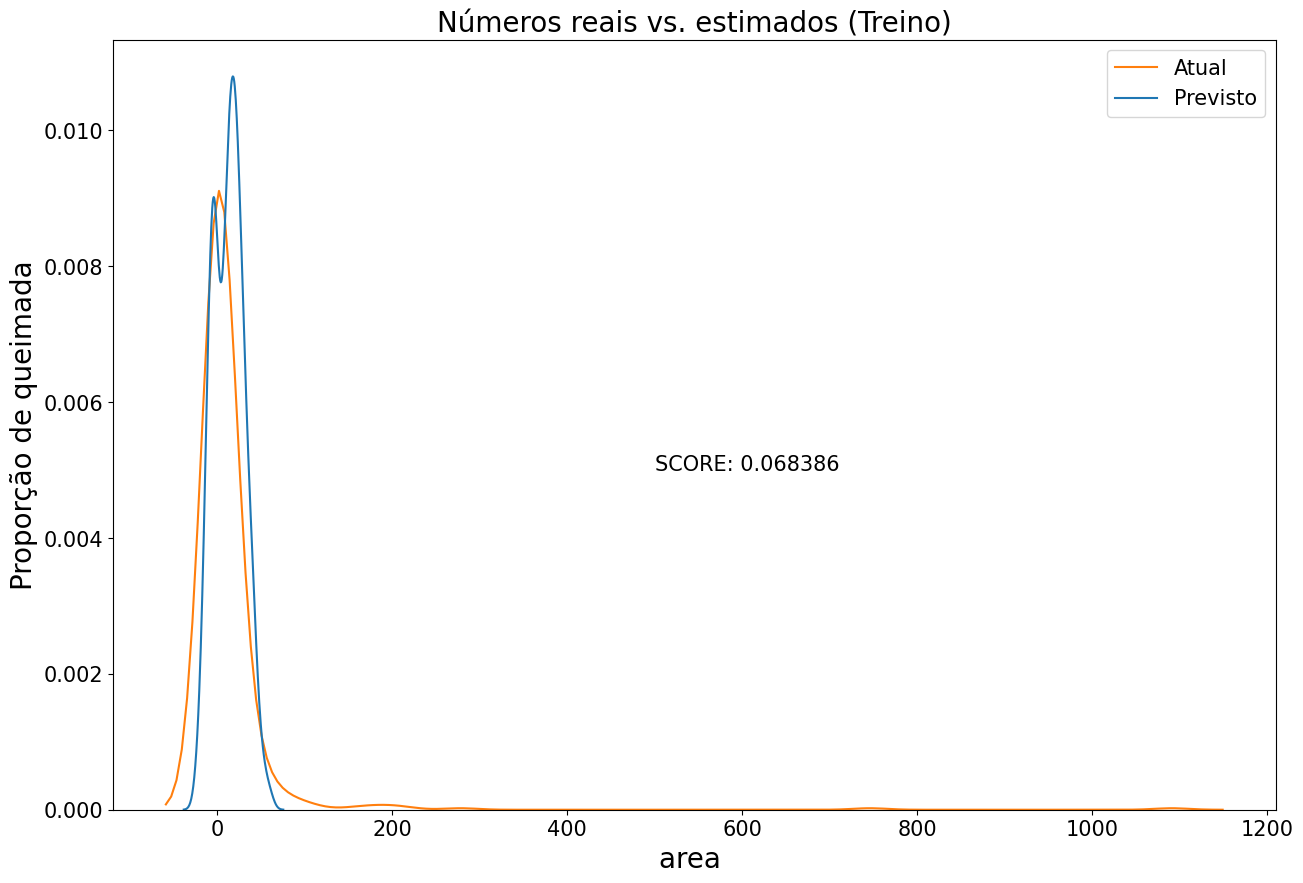

In [23]:
# Predizendo os valores
YHat = lm.predict(X_train)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_train], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (Treino)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_train = "SCORE: %4f" % R2_TRAIN

plt.text(500, 0.005, tt_train, size= 15)

Text(50, 0.005, 'SCORE: -0.507164')

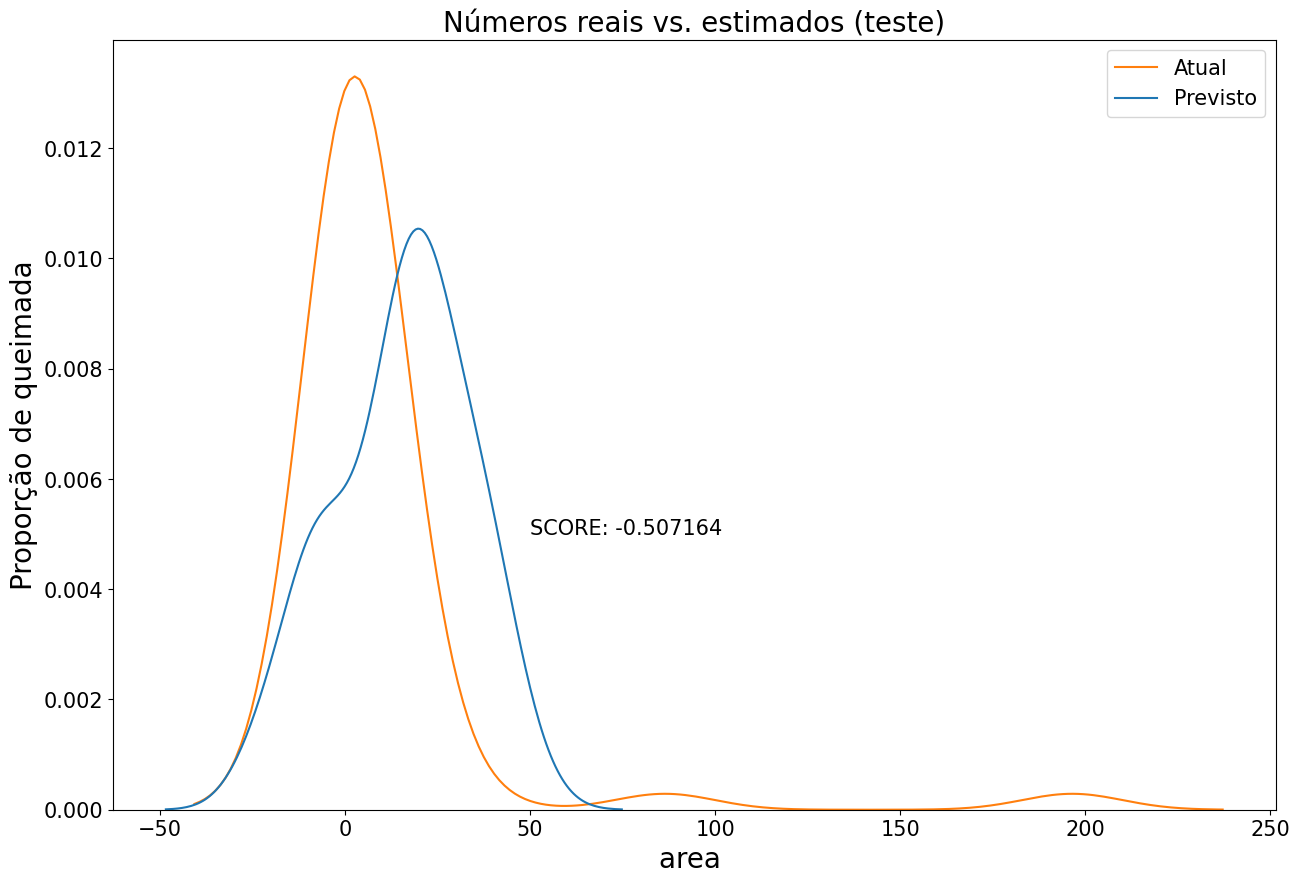

In [24]:
# Predizendo os valores
YHat = lm.predict(X_test)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_test], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (teste)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_test = "SCORE: %4f" % R2_TEST

plt.text(50, 0.005, tt_test, size=15)

## n_splits 30

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

model = Ridge(alpha=1.0)
model = Lasso(alpha=0.1)

X = df_dummy.drop(['area'], axis = 1)
Y = df_dummy['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Separate features and target variable
X = df_dummy.drop(columns=['area'])
y = df_dummy['area']

#Initialize the KFold object with 10 folds
kf = KFold(n_splits=30, shuffle=True, random_state=42)


In [26]:
mse_scores = []
mae_scores = []
mape_scores = []
r2_scores = []

#Iterate over each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

#Train a linear regression model
    lm.fit(X_train, y_train)

#Predict on the test set
    y_pred = lm.predict(X_test)

#Calculate Mean Squared Error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape= mae/y_test.mean()

    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(lm.score(X_test,y_test))


#Calculate the average MSE across all folds
print("Average MSE :", np.mean(mse_scores))
print("Average MAE :", np.mean(mae_scores))
print("Average MAPE:", np.mean(mape_scores))
print("Average R2  :", np.mean(r2_scores))

print(r2_scores)

Average MSE : 3920.506874430095
Average MAE : 20.057093898552814
Average MAPE: 2.5337988132249194
Average R2  : -2.7537372589328535
[-25.294770040016143, -1.887351276513646, -0.023615514236781987, 0.13402217164299712, 0.22474374759441562, -1.033877167280456, -8.388409391752598, -0.5706565134872252, -3.199513791073403, -0.024064043138045, -20.667430468594205, -0.30129001500322206, -0.9439257033496147, -1.8458721476297932, 0.3081848270266656, -3.2794984820094024, 0.07493999024582154, 0.23991653146936198, 0.051511479876766075, -1.0160799414088948, -1.3923161502451467, -0.3632902997139724, -0.27470762395384596, -0.06364974582797034, -4.299990293803107, -1.4062448386885622, -0.7320056232658412, -0.06085320378494363, -0.4629607682917358, -6.113063472773099]


In [27]:
from sklearn.model_selection import cross_val_score

splits = 30
scores = cross_val_score(lm, df_dummy.drop(['area'],axis=1), df_dummy['area'], cv = splits, scoring = 'r2')
scores

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.64160285e+03,
       -8.72042350e+03, -7.79933917e+02, -1.57659179e+02, -1.23019937e+01,
       -3.70685953e+00, -2.59752179e-01, -5.26829525e+01, -3.71328592e+00,
        1.73246738e-01, -1.74220159e+01, -8.21841073e+00, -1.54091444e+00,
       -1.86466251e+01,  2.45761251e-01,  1.50386092e-01, -4.97802309e+01,
       -5.52413538e-02, -2.24432108e+01, -6.42066562e-01, -7.49070612e-02,
       -8.69576446e-01, -1.82990661e-02])

Text(500, 0.005, 'SCORE: 0.068386')

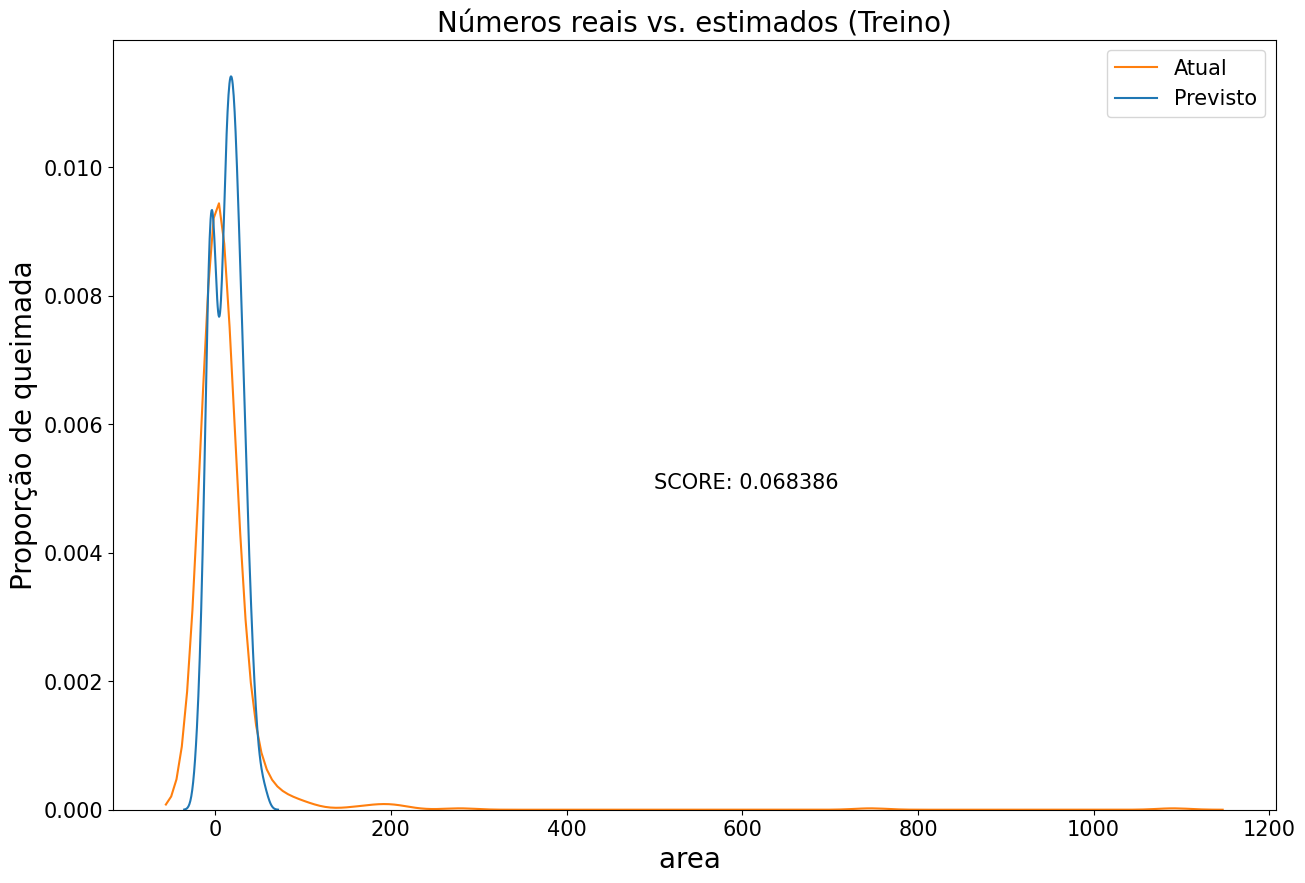

In [28]:
#Predizendo os valores
YHat = lm.predict(X_train)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_train], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (Treino)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_train = "SCORE: %4f" % R2_TRAIN

plt.text(500, 0.005, tt_train, size= 15)

Text(50, 0.005, 'SCORE: -0.507164')

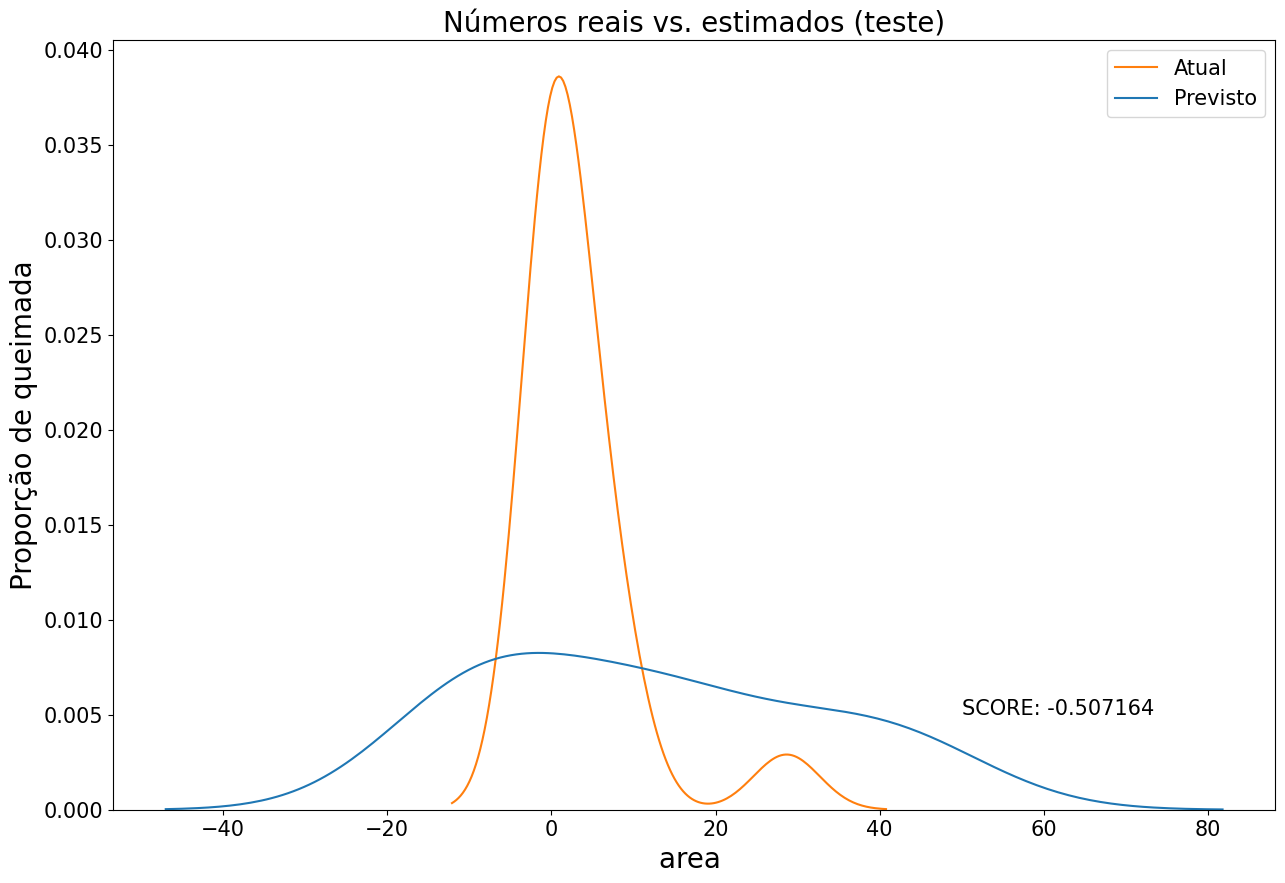

In [29]:
# Predizendo os valores
YHat = lm.predict(X_test)
YHat = pd.Series(YHat, name='YHat')

df = pd.concat([YHat, y_test], axis=1)
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df)

plt.title('Números reais vs. estimados (teste)', size = 20)
plt.xlabel('area ', size = 20)
plt.ylabel('Proporção de queimada', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt_test = "SCORE: %4f" % R2_TEST

plt.text(50, 0.005, tt_test, size=15)

In [30]:
#print todos os erros
print(f'Average MAE :, np.mean{mae_scores}')
print(f'Average MAPE:, np.mean{mape_scores}')
print(f'Average R2  :, np.mean{r2_scores}')

Average MAE :, np.mean[15.071028846309853, 15.437196949001699, 70.0848945990631, 21.57541831972119, 13.427692288516464, 17.990666431676207, 14.903791836791855, 18.379410905436004, 13.11198226281247, 40.88665475518357, 12.48717771163236, 15.23474185263542, 19.686322976567798, 13.184203341586613, 12.130781300578912, 17.194734409662278, 10.000520677457967, 24.60093142085694, 16.137045478822145, 16.571349658108574, 11.31661594212342, 13.459195881884494, 17.91757846698383, 64.38380369852047, 13.950633384429823, 13.63267648893798, 9.664632545709644, 24.020787323223377, 20.23361678933762, 15.036730413012434]
Average MAPE:, np.mean[8.488063805806549, 1.7687431259199908, 1.022051269764594, 1.155860382020243, 1.8832668006334452, 1.7896214190117257, 3.9968452482457297, 2.1906330042235997, 2.3817042255349077, 1.0887907561805803, 6.86552461506307, 1.4741340514246808, 3.6456153660310733, 1.907988906163041, 1.6039766828174653, 3.720382906507048, 1.2766302584424827, 1.0021226227555367, 1.3533782592006

## De acordo com os modelos de treino e teste, é perceptivel um modelo inadequado, pois as variáveis não atendem a necessidade para obter um melhor desempenho do modelo. Um R2 bom no treino e ruim no teste e também os erros com valores bem altos. Chegando a uma interpretação de que o modelo nao é adequado, para ser, seria necessário mais coletas de dados para encontrar melhores variáveis e etc.


## R² é baixo no modelo de teste: Isso significa que o modelo não consegue explicar a variação dos dados, ou seja, as variáveis independentes podem não estar correlacionadas o suficiente com a variável dependente. Isso indica que o modelo utilizado ou os dados estão inadequados.

## Temos um MAPE alto: O MAPE mostra que o modelo está errando em suas previsões com uma margem que pode não ser aceitável para o contexto do problema. Isso reflete diretamente na sua inadequação.